In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('currency.txt')

In [28]:
data.columns = ['var', 'skew', 'kurt', 'entropy', 'label']

In [20]:
print(list(df.columns))

['var', 'skew', 'kurt', 'entropy', 'label']


In [21]:
df.head()

,var,skew,kurt,entropy,label
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   var      1371 non-null   float64
 1   skew     1371 non-null   float64
 2   kurt     1371 non-null   float64
 3   entropy  1371 non-null   float64
 4   label    1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


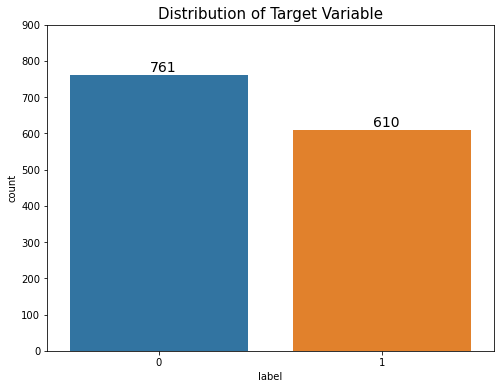

In [30]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target Variable', size=15)
sns.countplot(x=data['label'])
target_count = data.label.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [32]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='label')
data = data[nb_to_delete:]
print(data['label'].value_counts())

0    610
1    610
Name: label, dtype: int64


In [34]:
X = df.drop('label', axis=1)
y = df['label']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [56]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred Negative", "Pred Positive"],
                        index=['True Negative', "True Positive"])

print(conf_mat)

               Pred Negative  Pred Positive
True Negative            144              4
True Positive              1            126


In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

f1 = round(f1_score(y_test,y_pred),3)
accuracy = round(accuracy_score(y_test, y_pred),3)
precision = round(precision_score(y_test,y_pred),3)
recall = round(recall_score(y_test,y_pred),3)

print(f'\n Accuracy =', accuracy)
print(f'\n Precision =', precision)
print(f'\n Recall =', recall)
print(f'\n F1 Score =', f1)


 Accuracy = 0.982

 Precision = 0.969

 Recall = 0.992

 F1 Score = 0.981
